In [2]:
import requests
import json

def fetch_gdp_growth_ireland():
    """
    Fetches the annual GDP growth rate for Ireland from the World Bank API.

    Returns:
        dict: A dictionary containing the year and corresponding GDP growth rate.
    """
    url = "http://api.worldbank.org/v2/country/IE/indicator//NY.GDP.PCAP.CD?format=json"
    response = requests.get(url)
    
    if response.status_code != 200:
        print(f"Failed to get data: {response.status_code}")
        return None

    data = json.loads(response.text)
    gdp_growth_data = {}

    for entry in data[1]:
        year = entry['date']
        gdp_growth = entry['value']
        if gdp_growth is not None:
            gdp_growth_data[year] = gdp_growth

    return gdp_growth_data

if __name__ == "__main__":
    ireland_gdp_growth = fetch_gdp_growth_ireland()
    print("Ireland's GDP growth data:")
    print(ireland_gdp_growth)


Ireland's GDP growth data:
{'2022': 104038.946076296, '2021': 100172.079253421, '2020': 85420.1908556082, '2019': 80927.0746710651, '2018': 79250.387851767, '2017': 69970.9489145768, '2016': 62895.9111239299, '2015': 62053.9844381587, '2014': 55643.0594338739, '2013': 51546.3547634549, '2012': 49054.6974340641, '2011': 52183.1329312158, '2010': 48663.6004439262, '2009': 52133.0906162544, '2008': 61353.1065629523, '2007': 61396.417461176, '2006': 54329.1618599624, '2005': 50933.0216095589, '2004': 47754.2023194244, '2003': 41203.5295847568, '2002': 32705.4345565698, '2001': 28282.409882073, '2000': 26334.5672050501, '1999': 26338.1077543817, '1998': 24294.8547674007, '1997': 22551.1139134126, '1996': 20835.8977130847, '1995': 19158.4564773907, '1994': 15902.9296755168, '1993': 14657.0615549805, '1992': 15714.3847487231, '1991': 14087.2074393708, '1990': 14031.3025675469, '1989': 11175.816603647, '1988': 10715.8702780539, '1987': 9581.91308572415, '1986': 8112.17136316453, '1985': 6011.7

In [3]:
import requests
import pandas as pd

def fetch_oecd_data():
    # Define the API endpoint and parameters
    url = "https://stats.oecd.org/SDMX-JSON/data/QNA/IRL+USA+GBR.GDP+B1_GE.CUR+VOBARSA.Q/all?startTime=2009-Q1&endTime=2011-Q4"
    headers = {'Accept': 'application/json'}
    
    # Make the API request
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        data = response.json()
        
        # Extract and transform the data (this part will depend on the specific dataset)
        # For demonstration, let's just return the raw JSON data
        return data
    else:
        return f"Failed to fetch data. Status code: {response.status_code}"

# Fetch data
data = fetch_oecd_data()

# You can now use pandas to transform this data into a DataFrame and perform further analysis
# df = pd.DataFrame(data)


In [4]:
data

{'header': {'id': '836b7766-1d45-4a38-a8ad-c4420132f87f',
  'test': False,
  'prepared': '2023-09-10T15:47:12.1092717Z',
  'sender': {'id': 'OECD',
   'name': 'Organisation for Economic Co-operation and Development'},
  'links': [{'href': 'https://stats.oecd.org:443/SDMX-JSON/data/QNA/IRL+USA+GBR.GDP+B1_GE.CUR+VOBARSA.Q/all?startTime=2009-Q1&endTime=2011-Q4',
    'rel': 'request'}]},
 'dataSets': [{'action': 'Information',
   'series': {'0:0:0:0': {'attributes': [0, 0, 0, 0],
     'observations': {'0': [192492.7, None],
      '1': [191822.8, None],
      '2': [191282.8, None],
      '3': [186722.4, None],
      '4': [191816.1, None],
      '5': [191766.5, None],
      '6': [193343.8, None],
      '7': [192909.8, None],
      '8': [193823.9, None],
      '9': [196905.2, None],
      '10': [193953.2, None],
      '11': [194392.8, None]}},
    '1:0:0:0': {'attributes': [0, 1, 0, 0],
     'observations': {'0': [1701134.3, None],
      '1': [1696255.7, None],
      '2': [1698498.3, None],
 

In [5]:
import pandas as pd
import datetime as dt
import pandas_datareader.data as web

In [53]:
start_time = dt.datetime(2020, 1, 1)
end_time = dt.datetime(2023, 1, 1)
df = web.DataReader('REVPRT', 'oecd', start_time, end_time)

ValueError: Shape of passed values is (57, 620), indices imply (57, 660)

In [ ]:
print(df.shape)
df.info()
df.head()

In [ ]:
country = "Portugal"
df_japan_total = df[country]
df_japan_total

In [41]:
import requests

response = requests.get('https://stats.oecd.org/SDMX-JSON/data/SNA_TABLE1')

# validate that program is successfully receiving data
if response.status_code == 200:
    print('Success!')
else:
    print('An error has occurred ' + str(response.status_code))

oecd_json = response.json()

Success!


In [42]:
oecd_json

{'header': {'id': '194261a1-731f-4911-baba-24f56aef381f',
  'test': False,
  'prepared': '2023-09-10T21:38:57.9137047Z',
  'sender': {'id': 'OECD',
   'name': 'Organisation for Economic Co-operation and Development'},
  'links': [{'href': 'https://stats.oecd.org:443/SDMX-JSON/data/SNA_TABLE1',
    'rel': 'request'}]},
 'dataSets': [{'action': 'Information',
   'series': {'0:0:0': {'attributes': [0, 0, 0, None],
     'observations': {'0': [16613.0, None],
      '1': [17574.0, None],
      '2': [17788.0, None],
      '3': [19232.0, None],
      '4': [21251.0, None],
      '5': [23193.0, None],
      '6': [24382.0, None],
      '7': [27181.0, None],
      '8': [29209.0, None],
      '9': [32753.0, None],
      '10': [36905.0, None],
      '11': [40372.0, None],
      '12': [44548.0, None],
      '13': [49821.0, None],
      '14': [60362.0, None],
      '15': [71256.0, None],
      '16': [83349.0, None],
      '17': [96204.0, None],
      '18': [105058.0, None],
      '19': [118751.0, None

In [43]:
import pandas as pd

def get_from_oecd(sdmx_query):
    return pd.read_csv(
        f"https://stats.oecd.org/SDMX-JSON/data/{sdmx_query}?contentType=csv"
    )

print(get_from_oecd("MEI_FIN/IRLT.AUS.M/OECD").head())

  SUBJECT                                       Subject LOCATION    Country  \
0    IRLT  Long-term interest rates, Per cent per annum      AUS  Australia   
1    IRLT  Long-term interest rates, Per cent per annum      AUS  Australia   
2    IRLT  Long-term interest rates, Per cent per annum      AUS  Australia   
3    IRLT  Long-term interest rates, Per cent per annum      AUS  Australia   
4    IRLT  Long-term interest rates, Per cent per annum      AUS  Australia   

  FREQUENCY Frequency     TIME      Time Unit Code        Unit  \
0         M   Monthly  1969-07  Jul-1969        PC  Percentage   
1         M   Monthly  1969-08  Aug-1969        PC  Percentage   
2         M   Monthly  1969-09  Sep-1969        PC  Percentage   
3         M   Monthly  1969-10  Oct-1969        PC  Percentage   
4         M   Monthly  1969-11  Nov-1969        PC  Percentage   

   PowerCode Code PowerCode  Reference Period Code  Reference Period  Value  \
0               0     Units                    Na

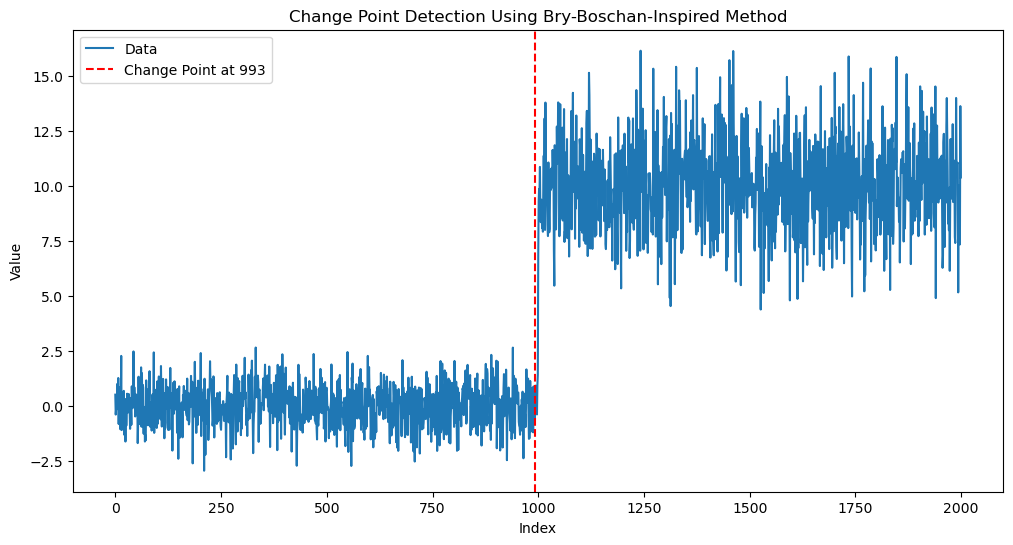

993

In [51]:
def bry_boschan_for_change_point(data, window_size=50):
    """
    Apply a Bry-Boschan-inspired algorithm to detect the change point in a combined dataset.

    Parameters:
        data (np.array): The data sequence.
        window_size (int): Size of the window to calculate the mean.

    Returns:
        int: Index of the detected change point.
    """
    half_window = window_size // 2
    for i in range(half_window, len(data) - half_window):
        mean_before = np.mean(data[i - half_window:i])
        mean_after = np.mean(data[i:i + half_window])
        if abs(mean_after - mean_before) > 1.5 * np.std(data[i - half_window:i + half_window]):
            return i

# Generate a single vector containing elements from two different normal distributions
single_vector = np.concatenate((np.random.normal(0, 1, 1000), np.random.normal(10, 2, 1000))) 

# Detect change point in the single_vector using the Bry-Boschan-inspired method
change_point = bry_boschan_for_change_point(single_vector)

# Plot the data and the detected change point
plt.figure(figsize=(12, 6))
plt.plot(single_vector, label='Data')
plt.axvline(x=change_point, color='r', linestyle='--', label=f'Change Point at {change_point}')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Change Point Detection Using Bry-Boschan-Inspired Method')
plt.legend()
plt.show()

change_point


In [47]:
print(change_point)

None


In [55]:
from mysenseds.modules.logger import log_exception

ImportError: cannot import name 'log_exception' from 'mysenseds.modules.logger' (/Users/diogoribeiro/opt/anaconda3/lib/python3.9/site-packages/mysenseds/modules/logger.py)

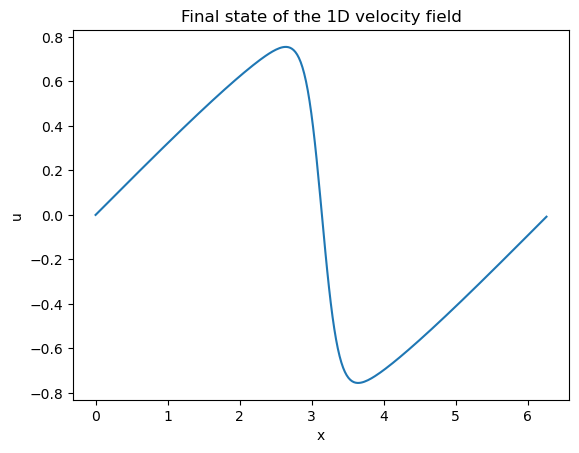

In [56]:
import numpy as np
import matplotlib.pyplot as plt

def compute_nonlinear_term(u, dx):
    """
    Compute the nonlinear term in physical space using finite difference.
    """
    du_dx = np.gradient(u, dx)
    nonlinear_term = -u * du_dx
    return nonlinear_term

def rk4_time_step(u, dx, dt, nu):
    """
    Perform one time step using the Runge-Kutta 4th order method.
    """
    k1 = dt * (compute_nonlinear_term(u, dx) + nu * np.fft.ifft(-k**2 * np.fft.fft(u)).real)
    k2 = dt * (compute_nonlinear_term(u + 0.5 * k1, dx) + nu * np.fft.ifft(-k**2 * np.fft.fft(u + 0.5 * k1)).real)
    k3 = dt * (compute_nonlinear_term(u + 0.5 * k2, dx) + nu * np.fft.ifft(-k**2 * np.fft.fft(u + 0.5 * k2)).real)
    k4 = dt * (compute_nonlinear_term(u + k3, dx) + nu * np.fft.ifft(-k**2 * np.fft.fft(u + k3)).real)
    
    new_u = u + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return new_u

# Initialize parameters
N = 256  # Number of grid points
L = 2.0 * np.pi  # Length of the domain
dx = L / N  # Grid spacing
dt = 0.001  # Time step
nu = 0.1  # Viscosity
T = 2.0  # Total simulation time

# Initialize variables
x = np.linspace(0, L, N, endpoint=False)
u = np.sin(x)  # Initial condition
k = np.fft.fftfreq(N, d=dx) * 2 * np.pi  # Wavenumbers for FFT

# Time integration loop
time = 0.0
while time < T:
    u = rk4_time_step(u, dx, dt, nu)
    time += dt

# Plot the final state
plt.plot(x, u)
plt.xlabel('x')
plt.ylabel('u')
plt.title('Final state of the 1D velocity field')
plt.show()


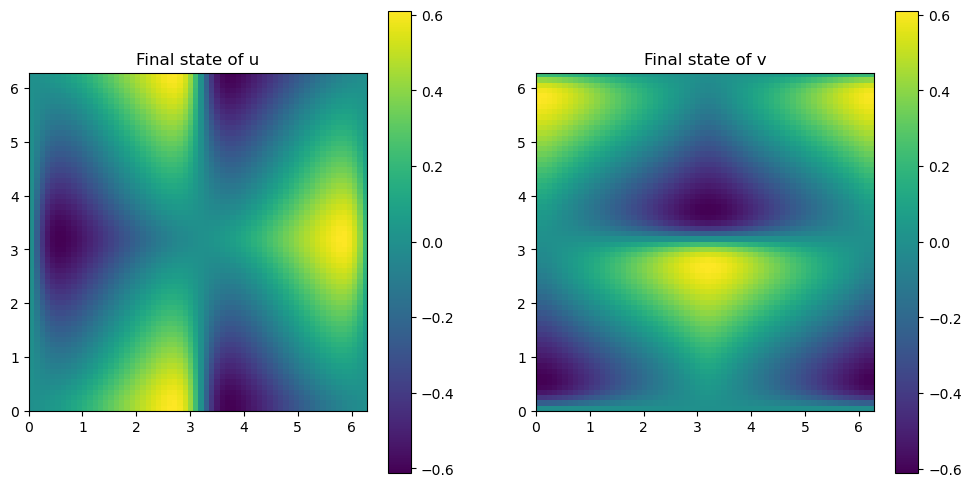

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def compute_nonlinear_term(u, v, dx, dy):
    """
    Compute the nonlinear term (u * grad(u)) + (v * grad(v)) in physical space using finite differences.
    """
    du_dx = np.gradient(u, axis=1) / dx
    du_dy = np.gradient(u, axis=0) / dy
    dv_dx = np.gradient(v, axis=1) / dx
    dv_dy = np.gradient(v, axis=0) / dy
    
    nonlinear_term_u = -u * du_dx - v * du_dy
    nonlinear_term_v = -u * dv_dx - v * dv_dy
    
    return nonlinear_term_u, nonlinear_term_v

def rk4_time_step(u, v, dx, dy, dt, nu, kx, ky):
    """
    Perform one time step using the Runge-Kutta 4th order method.
    """
    # Compute k1
    nonlinear_u1, nonlinear_v1 = compute_nonlinear_term(u, v, dx, dy)
    k1_u = dt * (nonlinear_u1 + nu * np.fft.ifft2(-(kx**2 + ky**2) * np.fft.fft2(u)).real)
    k1_v = dt * (nonlinear_v1 + nu * np.fft.ifft2(-(kx**2 + ky**2) * np.fft.fft2(v)).real)
    
    # Compute k2
    nonlinear_u2, nonlinear_v2 = compute_nonlinear_term(u + 0.5 * k1_u, v + 0.5 * k1_v, dx, dy)
    k2_u = dt * (nonlinear_u2 + nu * np.fft.ifft2(-(kx**2 + ky**2) * np.fft.fft2(u + 0.5 * k1_u)).real)
    k2_v = dt * (nonlinear_v2 + nu * np.fft.ifft2(-(kx**2 + ky**2) * np.fft.fft2(v + 0.5 * k1_v)).real)
    
    # Compute k3
    nonlinear_u3, nonlinear_v3 = compute_nonlinear_term(u + 0.5 * k2_u, v + 0.5 * k2_v, dx, dy)
    k3_u = dt * (nonlinear_u3 + nu * np.fft.ifft2(-(kx**2 + ky**2) * np.fft.fft2(u + 0.5 * k2_u)).real)
    k3_v = dt * (nonlinear_v3 + nu * np.fft.ifft2(-(kx**2 + ky**2) * np.fft.fft2(v + 0.5 * k2_v)).real)
    
    # Compute k4
    nonlinear_u4, nonlinear_v4 = compute_nonlinear_term(u + k3_u, v + k3_v, dx, dy)
    k4_u = dt * (nonlinear_u4 + nu * np.fft.ifft2(-(kx**2 + ky**2) * np.fft.fft2(u + k3_u)).real)
    k4_v = dt * (nonlinear_v4 + nu * np.fft.ifft2(-(kx**2 + ky**2) * np.fft.fft2(v + k3_v)).real)
    
    # Update u and v
    new_u = u + (k1_u + 2 * k2_u + 2 * k3_u + k4_u) / 6
    new_v = v + (k1_v + 2 * k2_v + 2 * k3_v + k4_v) / 6
    
    return new_u, new_v

# Initialize parameters
N = 64  # Number of grid points in each direction
Lx, Ly = 2.0 * np.pi, 2.0 * np.pi  # Lengths of the domain
dx, dy = Lx / N, Ly / N  # Grid spacings
dt = 0.001  # Time step
nu = 0.1  # Viscosity
T = 2.0  # Total simulation time

# Initialize variables
x = np.linspace(0, Lx, N, endpoint=False)
y = np.linspace(0, Ly, N, endpoint=False)
x, y = np.meshgrid(x, y)

u = np.sin(x) * np.cos(y)  # Initial condition for u
v = -np.cos(x) * np.sin(y)  # Initial condition for v

kx = np.fft.fftfreq(N, d=dx) * 2 * np.pi  # Wavenumbers in x-direction for FFT
ky = np.fft.fftfreq(N, d=dy) * 2 * np.pi  # Wavenumbers in y-direction for FFT
kx, ky = np.meshgrid(kx, ky)

# Time integration loop
time = 0.0
while time < T:
    u, v = rk4_time_step(u, v, dx, dy, dt, nu, kx, ky)
    time += dt

# Plot the final state
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(u, origin='lower', extent=[0, Lx, 0, Ly], cmap='viridis')
plt.colorbar()
plt.title('Final state of u')

plt.subplot(1, 2, 2)
plt.imshow(v, origin='lower', extent=[0, Lx, 0, Ly], cmap='viridis')
plt.colorbar()
plt.title('Final state of v')

plt.show()



In [59]:
y = np.array([1, 2, 4, 7, 11, 16])

In [60]:
np.gradient(y)

array([1. , 1.5, 2.5, 3.5, 4.5, 5. ])